# Import Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

# Read Data

In [ ]:
!wget -O teamchadchart.csv https://publicapi.traffy.in.th/share/teamchadchart/download

In [3]:
# Load the Excel file into a Pandas dataframe
df = pd.read_csv('teamchadchart.csv')

# Drop some columns
drop_col = [
    'ticket_id', 'address', 'comment', 'photo', 'photo_after', 
    'star', 'count_reopen', 'last_activity', 'organization'
]
df.drop(drop_col, axis=1, inplace=True)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.date())

# split coordinate column into separate latitude and longitude columns
df[['latitude', 'longitude']] = df['coords'].str.split(',', expand=True)

# drop the original coordinate column
df.drop(['coords'], axis=1, inplace=True)
df.head()

type subdistrict district       province   timestamp  \
0        {น้ำท่วม}   บางบอนใต้   บางบอน  กรุงเทพมหานคร  2023-05-17   
1   {ถนน,แสงสว่าง}       จอมพล  จตุจักร  กรุงเทพมหานคร  2023-05-17   
2  {กีดขวาง,จราจร}     ลุมพินี  ปทุมวัน  กรุงเทพมหานคร  2023-05-17   
3         {ต้นไม้}     หัวหมาก  บางกะปิ  กรุงเทพมหานคร  2023-05-17   
4               {}      ดินแดง   ดินแดง  กรุงเทพมหานคร  2023-05-17   

         state   latitude longitude  
0  รอรับเรื่อง  100.39673  13.64444  
1  รอรับเรื่อง  100.56249  13.80613  
2  รอรับเรื่อง  100.54032  13.74425  
3  รอรับเรื่อง  100.65870  13.75726  
4  รอรับเรื่อง  100.55957  13.76378

In [4]:
# rename province in Bangkok
df['province'] = df['province'].apply(lambda x: "กรุงเทพมหานคร" if x == "จังหวัดกรุงเทพมหานคร" else x)

# split 'type' in each row to list datatype
df['type'] = df['type'].apply(lambda x: x.strip('{}').split(','))

# add new column to count 'type' length
df['type_count'] = df['type'].apply(lambda x: len(x))
df.head()

type subdistrict district       province   timestamp  \
0         [น้ำท่วม]   บางบอนใต้   บางบอน  กรุงเทพมหานคร  2023-05-17   
1   [ถนน, แสงสว่าง]       จอมพล  จตุจักร  กรุงเทพมหานคร  2023-05-17   
2  [กีดขวาง, จราจร]     ลุมพินี  ปทุมวัน  กรุงเทพมหานคร  2023-05-17   
3          [ต้นไม้]     หัวหมาก  บางกะปิ  กรุงเทพมหานคร  2023-05-17   
4                []      ดินแดง   ดินแดง  กรุงเทพมหานคร  2023-05-17   

         state   latitude longitude  type_count  
0  รอรับเรื่อง  100.39673  13.64444           1  
1  รอรับเรื่อง  100.56249  13.80613           2  
2  รอรับเรื่อง  100.54032  13.74425           2  
3  รอรับเรื่อง  100.65870  13.75726           1  
4  รอรับเรื่อง  100.55957  13.76378           1

# Remove Outliers

In [5]:
from scipy import stats

# convert coord column to float
df = df.astype({"latitude": float, "longitude": float})

# Calculate z-scores for latitude and longitude columns
z_lat  = np.abs(stats.zscore(df['latitude']))
z_long = np.abs(stats.zscore(df['longitude']))

# Define threshold value
threshold = 3

# Remove outliers from the dataframe
df = df[(z_lat < threshold) & (z_long < threshold)]
print(f"There are {df.shape[0]} rows after removing outliners.")

There are 996 rows after removing outliners.


In [6]:
# explode list of type to multiple rows
df_exploded = df.explode('type')
df_exploded.drop('type_count', axis=1, inplace=True)
df_exploded.head()

type subdistrict district       province   timestamp        state  \
0   น้ำท่วม   บางบอนใต้   บางบอน  กรุงเทพมหานคร  2023-05-17  รอรับเรื่อง   
1       ถนน       จอมพล  จตุจักร  กรุงเทพมหานคร  2023-05-17  รอรับเรื่อง   
1  แสงสว่าง       จอมพล  จตุจักร  กรุงเทพมหานคร  2023-05-17  รอรับเรื่อง   
2   กีดขวาง     ลุมพินี  ปทุมวัน  กรุงเทพมหานคร  2023-05-17  รอรับเรื่อง   
2     จราจร     ลุมพินี  ปทุมวัน  กรุงเทพมหานคร  2023-05-17  รอรับเรื่อง   

    latitude  longitude  
0  100.39673   13.64444  
1  100.56249   13.80613  
1  100.56249   13.80613  
2  100.54032   13.74425  
2  100.54032   13.74425

In [7]:
print(f"There are {df.shape[0]} rows in df dataframe.")
print(f"There are {df_exploded.shape[0]} rows in df_exploded dataframe.")

There are 996 rows in df dataframe.
There are 1664 rows in df_exploded dataframe.


# Clean Data

In [ ]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type         1658 non-null   object 
 1   subdistrict  1658 non-null   object 
 2   district     1658 non-null   object 
 3   province     1658 non-null   object 
 4   timestamp    1658 non-null   object 
 5   state        1658 non-null   object 
 6   latitude     1658 non-null   float64
 7   longitude    1658 non-null   float64
dtypes: float64(2), object(6)
memory usage: 116.6+ KB


In [ ]:
# number of missing values
null_counts = df_exploded.isnull().sum()
print(f"\nNumber of null values in each column after imputing:\n{null_counts}")


Number of null values in each column after imputing:
type           0
subdistrict    0
district       0
province       0
timestamp      0
state          0
latitude       0
longitude      0
dtype: int64


In [8]:
# before cleaning empty string
print(f"There are {df_exploded.shape[0]} rows before cleaning.")

# after cleaning empty string
df_exploded['type'] = df_exploded['type'].str.strip()
df_exploded.drop(df_exploded[df_exploded['type'] == ''].index, inplace=True)
print(f"There are {df_exploded.shape[0]} rows after cleaning.")

There are 1664 rows before cleaning.
There are 1594 rows after cleaning.


# Visualize Data

In [ ]:
def compare_count_plot(data, column, title):
    # create a new font with Thai support
    font_path = 'THSarabunChula-Regular.ttf'

    # data[column].value_counts()
    type_list = data[column].value_counts().index

    # set font
    sns.set(font_scale=2)
    sns.set(rc={'figure.figsize': (12, 8)})
    sns.set(font=fm.FontProperties(fname=font_path).get_name())

    # plot bar graph
    ax = sns.countplot(y=column, data=data, order=type_list)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()


def compare_pie_plot(data, column, title):
    # create a new font with Thai support
    font_path = 'THSarabunChula-Regular.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # set the font as the default for Matplotlib
    plt.rcParams['font.family'] = font_prop.get_name()

    # set font
    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15

    # data[column].value_counts()
    type_counts = data[column].value_counts()

    # Get four different grey colors
    cmap = plt.get_cmap('Greys')
    colors = list(cmap(np.linspace(0.45, 0.85, len(type_counts))))

    # Swap in a bright blue for the Lacrosse color
    colors[0] = 'dodgerblue'

    # plot pie chart
    plt.figure(figsize=(12, 8))
    patches, texts, pcts = plt.pie(
        type_counts, labels=type_counts.index,
        explode=[0.05, 0, 0], autopct='%1.1f%%', colors=colors,
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'black'},
        textprops={'size': 'x-large'}, startangle=90
    )

    # Set the corresponding text label color to the wedge's face color
    for i, patch in enumerate(patches):
        texts[i].set_color(patch.get_facecolor())

    # style just the percent values
    plt.setp(pcts, color='white', fontweight='bold')
    plt.title(title)
    plt.tight_layout()
    plt.show()

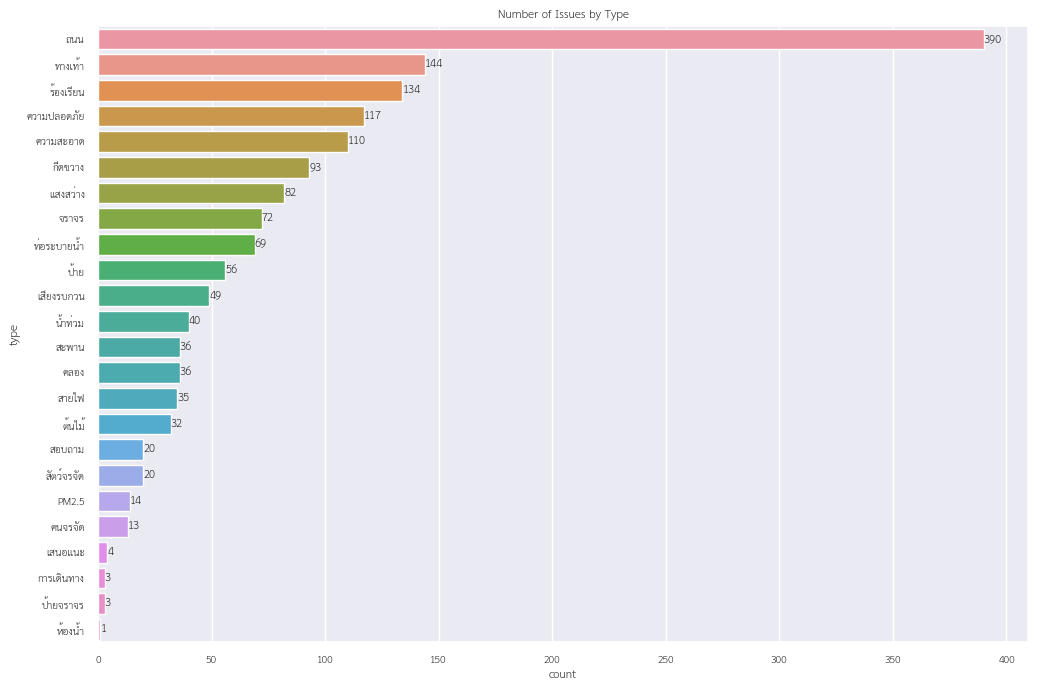

In [ ]:
compare_count_plot(df_exploded, 'type', 'Number of Issues by Type')

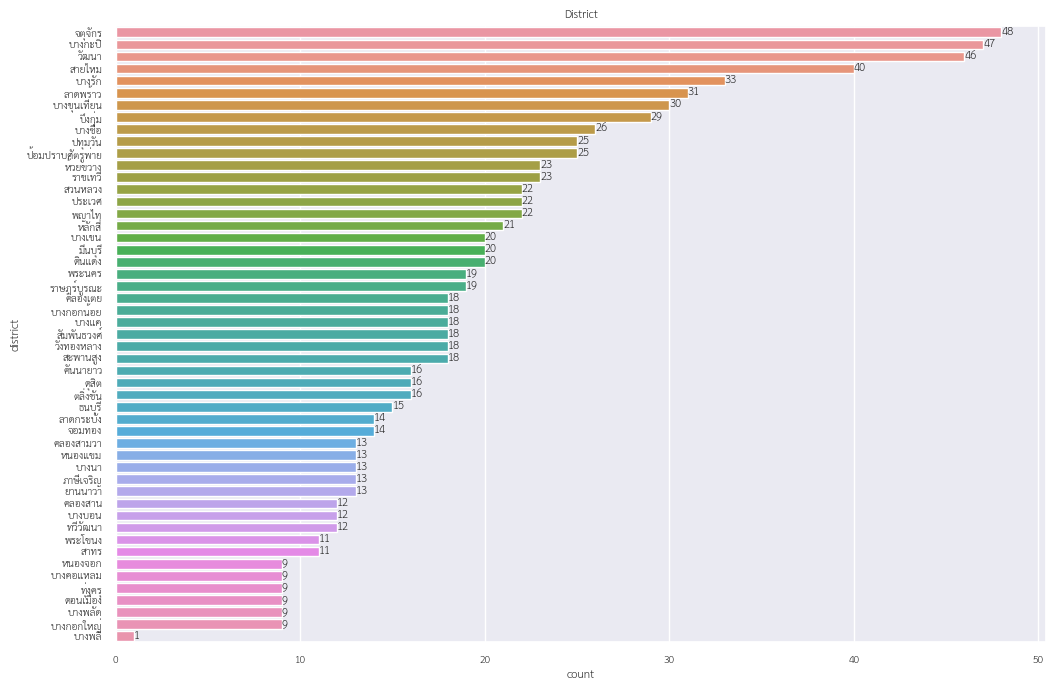

In [ ]:
compare_count_plot(df, 'district', 'District')

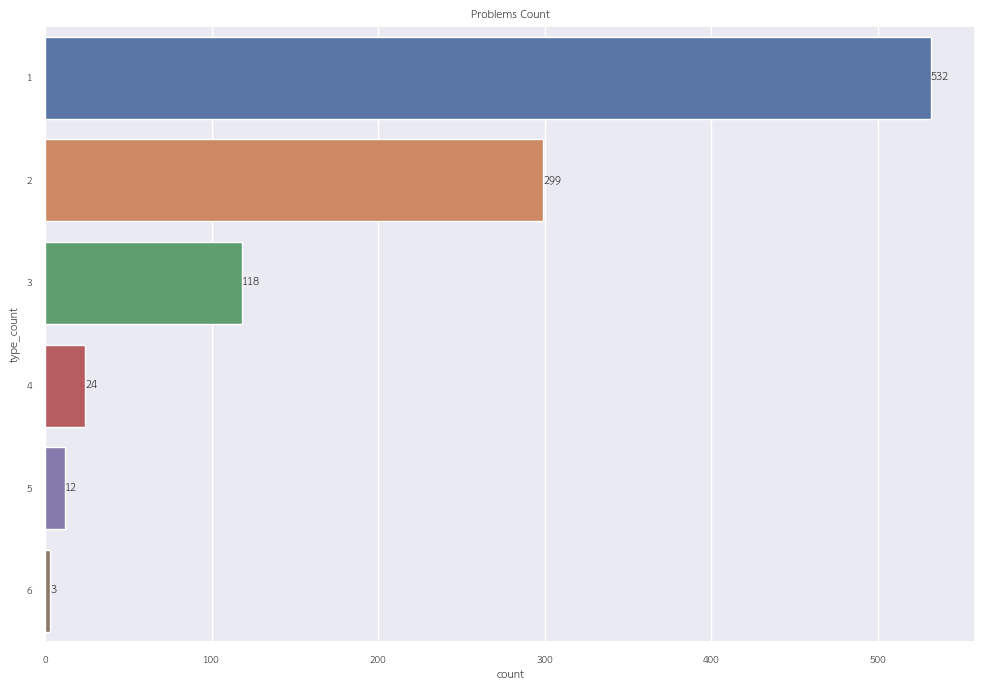

In [ ]:
compare_count_plot(df, 'type_count', 'Problems Count')

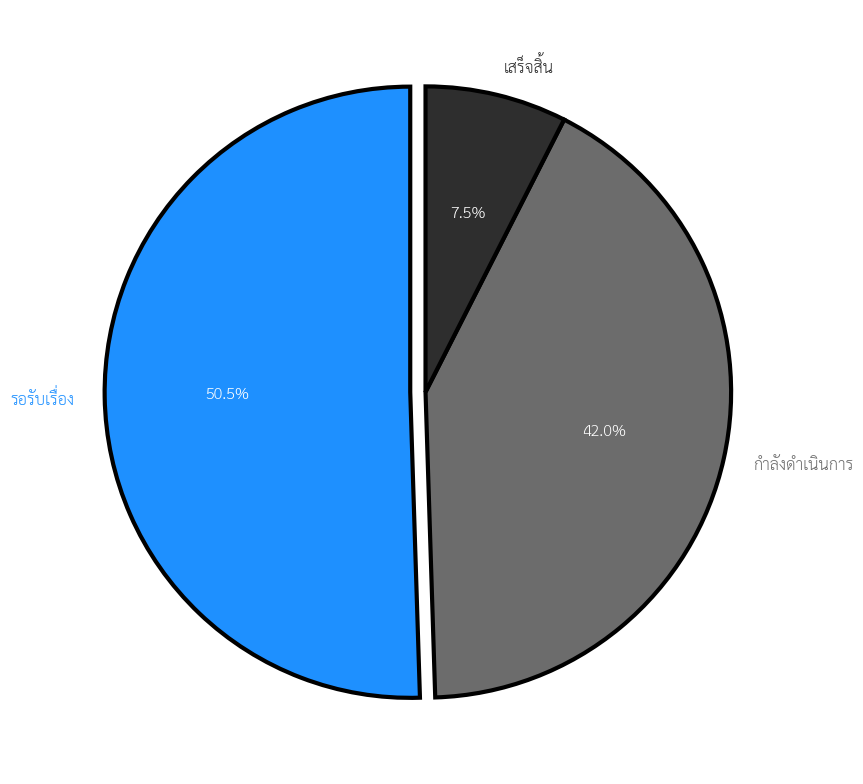

In [ ]:
compare_pie_plot(df, 'state', None)

In [ ]:
df['province'].value_counts()

กรุงเทพมหานคร    987
สมุทรปราการ        1
Name: province, dtype: int64

# Geospatial Visualize

In [ ]:
import folium

# size factor
factor = 3

# color procedure
def color_producer(state):
    if state == 'กำลังดำเนินการ':
        return 'blue'
    elif state == 'รอรับเรื่อง':
        return 'red'
    else:
        return 'green'

# Create a base map centered on a Thailand location
traffy_map = folium.Map(location=[13.7563, 100.5018], tiles="Stamen Terrain", zoom_start=12)

# Add Checkbox for filtering
process_group  = folium.FeatureGroup(name="Ongoing").add_to(traffy_map)
waiting_group  = folium.FeatureGroup(name="Upcoming").add_to(traffy_map)
finished_group = folium.FeatureGroup(name="Complete").add_to(traffy_map)

# Loop through the rows of the dataframe and add a marker for each location
for index, row in df.iterrows():
    lat = float(row['latitude'])
    lon = float(row['longitude'])
    count = int(row['type_count'])

    # Pop up information
    information = f"<b>Problem Count: {count}</b><br><br>Province: {row['province']}<br>District: {row['district']}"
    information += f"<br>State: {row['state']}<br>Problem: {row['type']}<br>Timestamp: {row['timestamp']}"

    iframe = folium.IFrame(information)
    popup = folium.Popup(iframe, min_width=300, max_width=300, min_height=150, max_height=180)

    # Add Group for filtering state
    if row['state'] == 'กำลังดำเนินการ':
        process_group.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(row['state']),
                color='black',
                fill_opacity=0.7
            )
        )
    elif row['state'] == 'รอรับเรื่อง':
        waiting_group.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(row['state']),
                color='black',
                fill_opacity=0.7
            )
        )
    else:
        finished_group.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(row['state']),
                color='black',
                fill_opacity=0.7
            )
        )

# Add control layer
folium.LayerControl().add_to(traffy_map)

# Save traffy_map to html file
traffy_map.save("Map_by_State.html")
traffy_map

In [ ]:
import folium

# size factor
factor = 3

# color procedure
def color_producer(count):
    if count == 1:
        return 'green'
    elif count == 2:
        return 'blue'
    elif count == 3:
        return 'orange'
    else:
        return 'red'

# Create a base map centered on a Thailand location
traffy_map = folium.Map(location=[13.7563, 100.5018], tiles="Stamen Terrain", zoom_start=12)

# Add Checkbox for filtering
group_1 = folium.FeatureGroup(name="Type Count 1").add_to(traffy_map)
group_2 = folium.FeatureGroup(name="Type Count 2").add_to(traffy_map)
group_3 = folium.FeatureGroup(name="Type Count 3").add_to(traffy_map)
group_4 = folium.FeatureGroup(name="Type Count 4").add_to(traffy_map)
group_5 = folium.FeatureGroup(name="Type Count 5").add_to(traffy_map)

# Loop through the rows of the dataframe and add a marker for each location
for index, row in df.iterrows():
    lat = float(row['latitude'])
    lon = float(row['longitude'])
    count = int(row['type_count'])

    # Pop up information
    information = f"<b>Problem Count: {count}</b><br><br>Province: {row['province']}<br>District: {row['district']}"
    information += f"<br>State: {row['state']}<br>Problem: {row['type']}<br>Timestamp: {row['timestamp']}"

    iframe = folium.IFrame(information)
    popup = folium.Popup(iframe, min_width=300, max_width=300, min_height=150, max_height=180)

    # Add Group for filtering count
    if count == 1:
        group_1.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(count),
                color='black',
                fill_opacity=0.7
            )
        )
    elif count == 2:
        group_2.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(count),
                color='black',
                fill_opacity=0.7
            )
        )
    elif count == 3:
        group_3.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(count),
                color='black',
                fill_opacity=0.7
            )
        )
    elif count == 4:
        group_4.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(count),
                color='black',
                fill_opacity=0.7
            )
        )
    else:
        group_5.add_child(
            folium.CircleMarker(
                location=[lon, lat],
                radius=count * factor,
                popup=popup,
                tooltip=row['district'],
                fill=True,
                fill_color=color_producer(count),
                color='black',
                fill_opacity=0.7
            )
        )

# Add control layer
folium.LayerControl().add_to(traffy_map)

# Save traffy_map to html file
traffy_map.save("Map_by_Size.html")
traffy_map

# K-Mean Clustering Model

In [10]:
from sklearn.preprocessing import StandardScaler

# filter by types
problem_type = ['ถนน', 'ทางเท้า']
df_filtered = df_exploded[df_exploded['type'].isin(problem_type)]

selected = ['latitude', 'longitude']
df_describe = df_filtered[selected]

x = df_describe.values

# Standardize variables with Standard Scaler
scaler = StandardScaler()
scaler.fit(x)

cluster_data = scaler.fit_transform(x)
cluster_data[:10]

array([[-0.1127993 ,  0.61793446],
       [ 0.54714701,  0.12662308],
       [ 0.48267518,  0.18101996],
       [-0.01292729,  1.06939697],
       [ 0.20886767,  0.35021957],
       [ 0.56158396,  0.26308968],
       [ 2.86595748,  1.95192314],
       [ 1.16249701,  0.60259581],
       [ 0.55505767,  0.2932926 ],
       [-0.71282241,  0.1293113 ]])

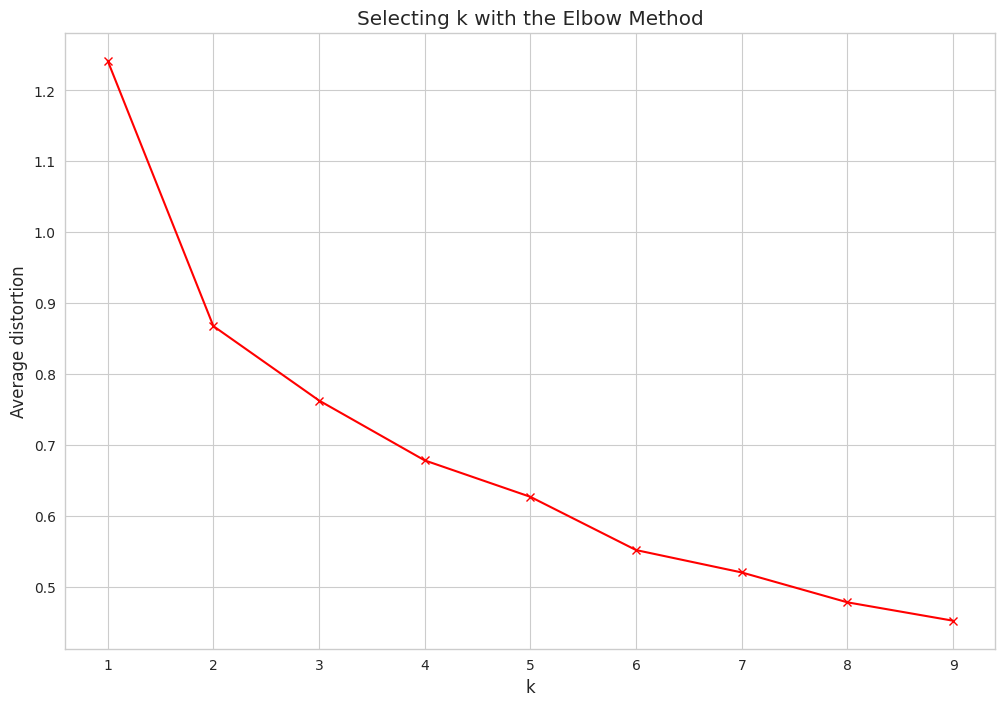

In [11]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Initialize the plot with the specified dimensions
fig = plt.figure(figsize=(12, 8))

# elbow method, to determine the optimal number of clusters
meandistortions = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(cluster_data)
    summation = sum(np.min(cdist(cluster_data, kmeans.cluster_centers_, 'euclidean'), axis=1))
    meandistortions.append(summation / cluster_data.shape[0])

plt.plot(range(1, 10), meandistortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=6, random_state=2020)
kmeans.fit(cluster_data)

KMeans(n_clusters=6, random_state=2020)

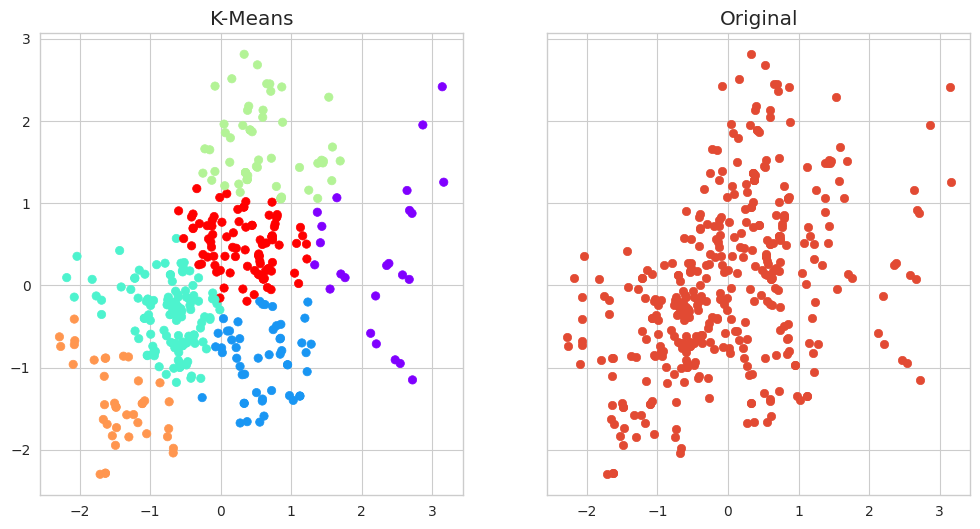

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

ax1.set_title('K-Means')
ax1.scatter(cluster_data[:, 0], cluster_data[:, 1], c=kmeans.labels_, cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(cluster_data[:, 0], cluster_data[:, 1], cmap='rainbow')
plt.show()

## Show the centroid of each cluster

In [14]:
# inverse transform to get original centroids back
original_data = scaler.inverse_transform(kmeans.cluster_centers_)

# get unique size for each clusters
(unique, counts) = np.unique(kmeans.labels_, return_counts=True)

print(f"Normalize data:\n{'-' * 30}")
for idx, (x, y) in enumerate(kmeans.cluster_centers_):
    print(f"centroid {idx + 1} = ({x:5.2f}, {y:5.2f}), size = {counts[idx]}")

print(f"\nOriginal data:\n{'-' * 30}")
for idx, (x, y) in enumerate(original_data):
    print(f"centroid {idx + 1} = ({x:.2f}, {y:.2f})")

Normalize data:
------------------------------
centroid 1 = ( 2.24,  0.35), size = 24
centroid 2 = ( 0.58, -0.89), size = 51
centroid 3 = (-0.72, -0.37), size = 131
centroid 4 = ( 0.61,  1.66), size = 57
centroid 5 = (-1.44, -1.42), size = 39
centroid 6 = ( 0.34,  0.48), size = 95

Original data:
------------------------------
centroid 1 = (100.80, 13.79)
centroid 2 = (100.63, 13.71)
centroid 3 = (100.50, 13.74)
centroid 4 = (100.64, 13.87)
centroid 5 = (100.43, 13.68)
centroid 6 = (100.61, 13.80)


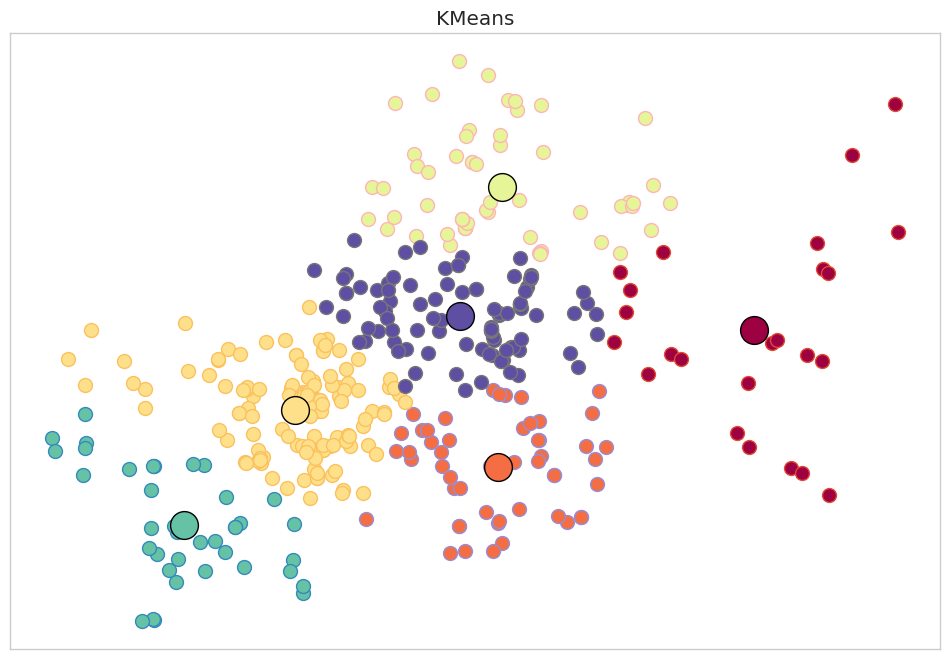

In [15]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# Colors uses a color map, which will produce an array of colors based on the
# number of labels there are. We use set(kmeans_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
for k, col in zip(range(len(kmeans.cluster_centers_)), colors):

    # Create a list of all data points, where the data points that are in the cluster 
    # (ex. cluster 0) are labeled as true, else they are labeled as false.
    my_members = (kmeans.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = kmeans.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(cluster_data[my_members, 0], cluster_data[my_members, 1], 'o', markerfacecolor=col, markersize=10)
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=20)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

## Visualize cluster model

In [20]:
# Label data by cluster
df_filtered['cluster_label'] = kmeans.labels_
df_filtered['cluster_label'].value_counts()

2    131
5     95
3     57
1     51
4     39
0     24
Name: cluster_label, dtype: int64

In [30]:
# Get the cluster labels and their counts
cluster_counts = df_filtered['cluster_label'].value_counts()

# Generate a color palette based on the number of clusters
n_clusters = len(cluster_counts)
palette = sns.color_palette("viridis", n_clusters)
palette

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [39]:
# Color procedure
def color_producer(cluster_label):
    return hex_colors[int(cluster_label)]

def rgb_to_hex(rgb):
    r, g, b = rgb
    return '#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255))

# Create a color dictionary mapping cluster labels to colors
color_dict = dict(zip(cluster_counts.index, palette * 255))
hex_colors = {k: rgb_to_hex(v) for k, v in color_dict.items()}
hex_colors

{2: '#46317e',
 5: '#365b8c',
 3: '#277e8e',
 1: '#1fa187',
 4: '#49c16d',
 0: '#9fd938'}

In [49]:
import folium

# Create a base map centered on a Thailand location
traffy_map = folium.Map(location=[13.7563, 100.5018], tiles="Stamen Terrain", zoom_start=12)

def plot_cluster_by_problems(base_map):
    # Add Checkbox for filtering
    process_group  = folium.FeatureGroup(name="Ongoing").add_to(base_map)
    waiting_group  = folium.FeatureGroup(name="Upcoming").add_to(base_map)
    finished_group = folium.FeatureGroup(name="Complete").add_to(base_map)

    # Loop through the rows of the dataframe and add a marker for each location
    for index, row in df_filtered.iterrows():
        lat = float(row['latitude'])
        lon = float(row['longitude'])
        label = int(row['cluster_label'])

        # Pop up information
        information = f"<b>Problem Type: {row['type']}</b><br><br>Cluster: {label}<br>Province: {row['province']}"
        information += f"<br>District: {row['district']}<br>State: {row['state']}<br>Timestamp: {row['timestamp']}"

        iframe = folium.IFrame(information)
        popup = folium.Popup(iframe, min_width=300, max_width=300, min_height=140, max_height=170)

        # Add Group for filtering state
        if row['state'] == 'กำลังดำเนินการ':
            process_group.add_child(
                folium.CircleMarker(
                    location=[lon, lat],
                    popup=popup,
                    tooltip=row['district'],
                    fill=True,
                    fill_color=color_producer(label),
                    color='black',
                    fill_opacity=0.7
                )
            )
        elif row['state'] == 'รอรับเรื่อง':
            waiting_group.add_child(
                folium.CircleMarker(
                    location=[lon, lat],
                    popup=popup,
                    tooltip=row['district'],
                    fill=True,
                    fill_color=color_producer(label),
                    color='black',
                    fill_opacity=0.7
                )
            )
        else:
            finished_group.add_child(
                folium.CircleMarker(
                    location=[lon, lat],
                    popup=popup,
                    tooltip=row['district'],
                    fill=True,
                    fill_color=color_producer(label),
                    color='black',
                    fill_opacity=0.7
                )
            )

    # Add control layer
    folium.LayerControl().add_to(base_map)


# Plot lat and long
plot_cluster_by_problems(traffy_map)

# Save traffy_map to html file
traffy_map.save("Map_by_Problem.html")
traffy_map

# DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
from sklearn.metrics.pairwise import haversine_distances

# Handling Location
points_in_radians = df[['latitude', 'longitude']].apply(np.radians).values
distances_in_km = haversine_distances(points_in_radians) * 6371

In [ ]:
from sklearn.cluster import DBSCAN

# distance_matrix = rating_distances + distances_in_km
distance_matrix = distances_in_km

clustering = DBSCAN(metric='precomputed', eps=1, min_samples=3)
clustering.fit(distance_matrix)

DBSCAN(eps=1, metric='precomputed', min_samples=3)

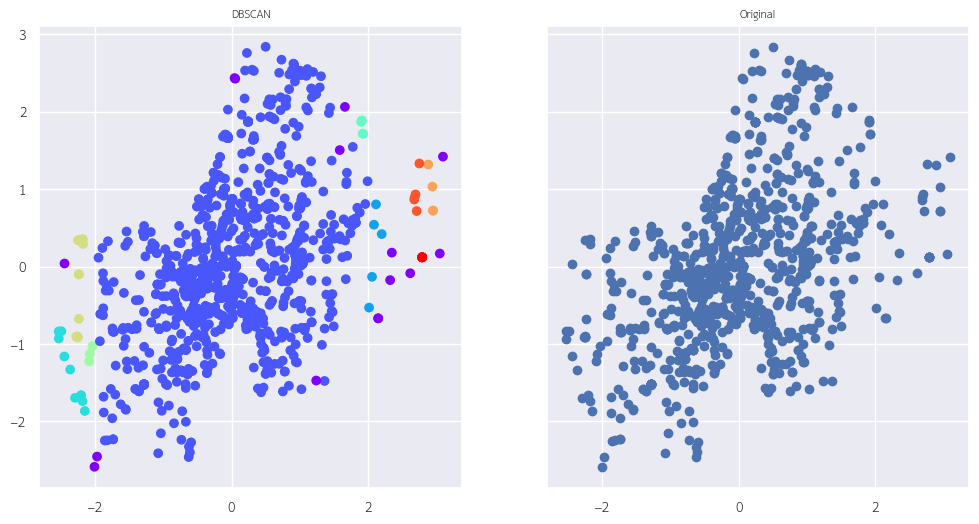

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

ax1.set_title('DBSCAN')
ax1.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clustering.labels_, cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(cluster_data[:, 0], cluster_data[:, 1], cmap='rainbow')
plt.show()

# Broke Heatmap Visualization

In [43]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
!pip install geopandas
!wget -O broke.csv https://gdcatalog.nha.co.th/datastore/dump/20157043-f7c5-433e-b061-40b72692bd8b?bom=True

In [45]:
broke_df = pd.read_csv("broke.csv")

cols = ["X", "Y", "Lat", "Long"]
for col in cols:
  broke_df[col] = broke_df[col].astype(float)
broke_df = broke_df[broke_df["PROV_NAMT"] == "กรุงเทพมหานคร"]

broke_df.head(4)

_id  COMM_ID               COMM_NAME  SHAPE_YEAR            X            Y  \
0    1   100002   ริมคลองกะจะ (บางส่วน)        2562  677065.7983  1520645.352   
1    2   100003   ลำสาลีพัฒนา (บางส่วน)        2562  678292.0616  1520800.927   
2    3   100004        วังโสม (บางส่วน)        2562  679393.2645  1521497.510   
3    4   100006  สามัคคีพัฒนา (บางส่วน)        2562  679269.1078  1522178.436   

         Lat        Long  PROV_CODE_1      PROV_NAMT  AMP_CODE_1 AMP_NAMT  \
0  13.749692  100.637682           10  กรุงเทพมหานคร           6  บางกะปิ   
1  13.751023  100.649030           10  กรุงเทพมหานคร           6  บางกะปิ   
2  13.757250  100.659256           10  กรุงเทพมหานคร           6  บางกะปิ   
3  13.763412  100.658152           10  กรุงเทพมหานคร           6  บางกะปิ   

   TAM_CODE_1 TAM_NAMT  
0           8  หัวหมาก  
1           8  หัวหมาก  
2           8  หัวหมาก  
3           8  หัวหมาก

In [46]:
heat_df = broke_df[["Lat", "Long"]]

# List comprehension to make out list of lists
heat_data = [[row['Lat'], row['Long']] for index, row in heat_df.iterrows()]

In [56]:
broke_map = folium.Map(location=[13.7563, 100.5668], tiles="cartodbdark_matter", zoom_start=12)

# HeatMap(heat_data, radius=13, blur=15,).add_to(broke_map)
heatmap_group = folium.FeatureGroup(name="Heatmap").add_to(broke_map)
heatmap_group.add_child(
    HeatMap(heat_data, radius=13, blur=15,)
)

broke_map

In [57]:
plot_cluster_by_problems(broke_map)
broke_map

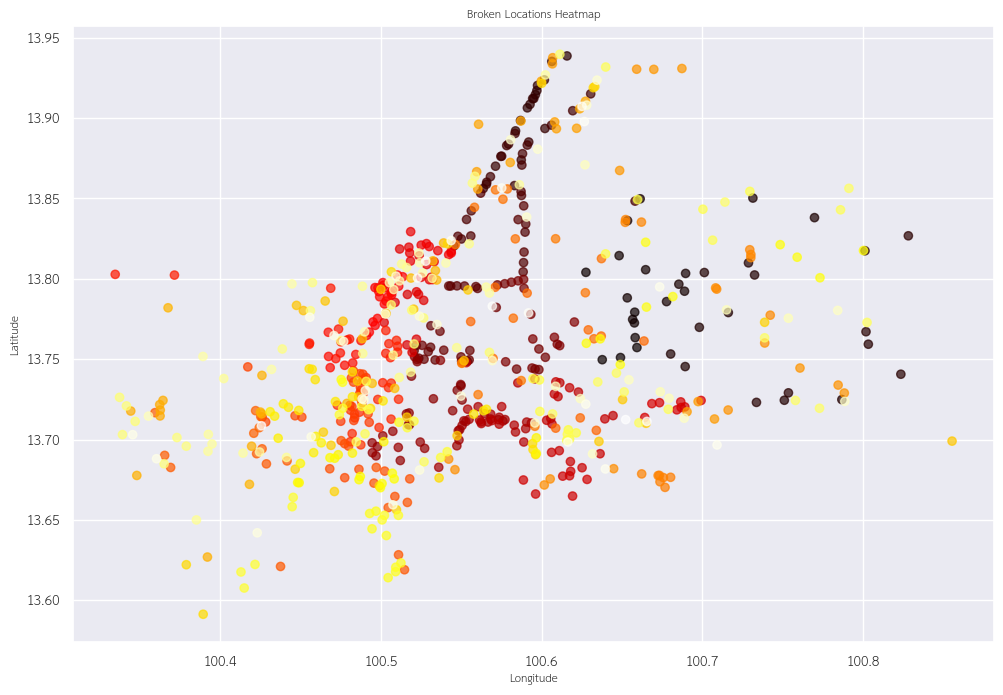

In [ ]:
import geopandas as gpd

# Create a GeoDataFrame from the broken locations
geometry = gpd.points_from_xy(broke_df['Long'], broke_df['Lat'])
broke_gdf = gpd.GeoDataFrame(broke_df, geometry=geometry)

# Create a KDE plot using the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 8))
broke_gdf.plot(ax=ax, cmap='hot', alpha=0.7)

# Set the axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Broken Locations Heatmap')

# Show the plot
plt.show()

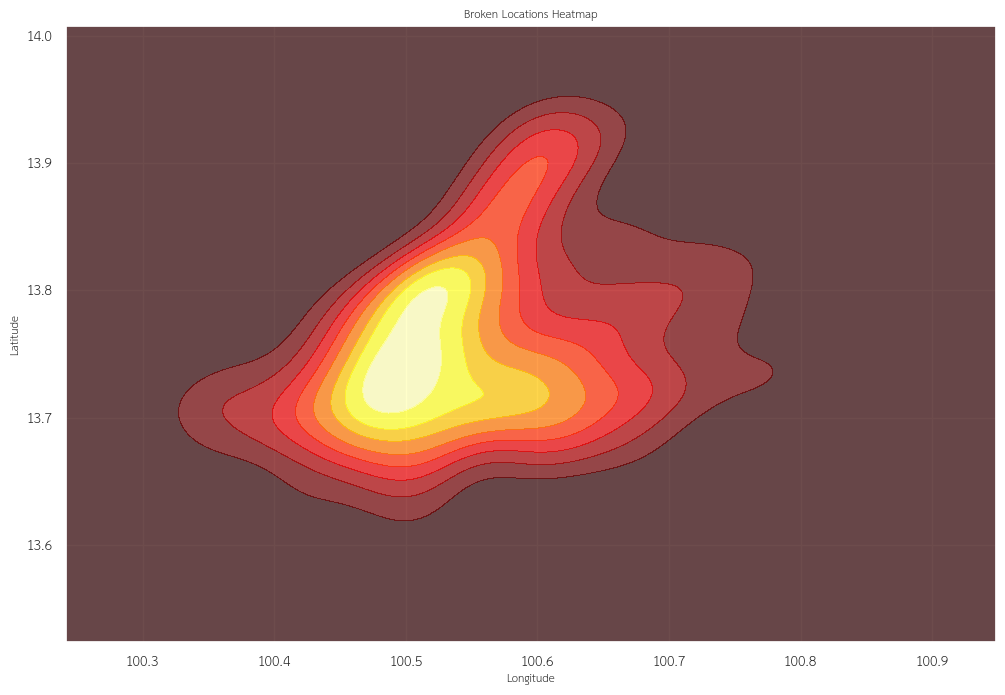

In [ ]:
import geopandas as gpd

# Create a GeoDataFrame from the broken locations
geometry = gpd.points_from_xy(broke_df['Long'], broke_df['Lat'])
broke_gdf = gpd.GeoDataFrame(broke_df, geometry=geometry)

# Create a KDE plot using the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(
    data=broke_df, x='Long', y='Lat', cmap='hot', 
    alpha=0.7, shade=True, shade_lowest=True
)

# Set the axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Broken Locations Heatmap')

# Show the plot
plt.show()